In [142]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Importing library

In [143]:
# Import imp libraries
import re  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# Natural Language Processing (NLP)
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Replace with specific category
warnings.filterwarnings("ignore", category=FutureWarning)  # Common for pandas updates
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)  # For SettingWithCopyWarning

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deepakbajare/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/deepakbajare/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the data from csv file

In [144]:
# Importing the dataset 
dataframe= pd.read_csv("IMDB Dataset.csv")
dataframe.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [145]:
print(f"the shape of dataset:{dataframe.shape}")

the shape of dataset:(50000, 2)


In [146]:
# checking the last 10 values of dataset
dataframe.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [147]:
# Display the number of records
print('length of data is', len(dataframe))

length of data is 50000


In [148]:
df = pd.DataFrame(dataframe)
# Count the number of words in the 'review' column
df['Word_Count'] = df['review'].apply(lambda x: len(str(x).split()))

df

,review,sentiment,Word_Count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
...,...,...,...
49995,I thought this movie did a down right good job...,positive,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112
49997,I am a Catholic taught in parochial elementary...,negative,230
49998,I'm going to have to disagree with the previou...,negative,212


In [149]:
# Filter rows where the word count is at least 40 and less than 120
filtered_df = df[(df['Word_Count'] >= 40) & (df['Word_Count'] <= 120)]

In [150]:
# displaying the shape of data
filtered_df.shape

(10112, 3)

In [151]:
# Displaying the filtered dataframe information
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10112 entries, 5 to 49996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      10112 non-null  object
 1   sentiment   10112 non-null  object
 2   Word_Count  10112 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 316.0+ KB


In [152]:
# Verifying whether duplicate values are present in order to clear
filtered_df.duplicated().any()

True

In [153]:
# Removed the duplicates values and stored in dataFrame
dataFrame=filtered_df.drop_duplicates()
dataFrame.duplicated().any()

False

In [154]:
# Verifying whether null values are present in order to clear
dataFrame.isnull().any()

review        False
sentiment     False
Word_Count    False
dtype: bool

In [155]:
# Rows and columns in the dataset 
print('Count of columns in the data is:  ', len(dataFrame.columns))
print('Count of rows in the data is:  ', len(dataFrame))

Count of columns in the data is:   3
Count of rows in the data is:   10001


In [156]:
# Add a column for review length if it's not already added
dataFrame['review_length'] = dataFrame['review'].apply(len)

# Create the interactive histogram
fig = px.histogram(dataFrame,
                    x='review_length', 
                    nbins=50, 
                    title='Distribution of Review Lengths', 
                    marginal="box",
                    height=500,
                    width=600)

# Update the traces to add a black line between the review lengths
fig.update_traces(marker_line_color='black', marker_line_width=2)

# Show the interactive plot
fig.show()




In [157]:
# Checking unique Target Values 
dataFrame['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [158]:
dataFrame.groupby('sentiment').count()

,review,Word_Count,review_length
sentiment,,,
negative,4704,4704,4704
positive,5297,5297,5297


In [159]:
# Count the sentiment labels
sentiment_counts = dataFrame['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Plot using Plotly Express
fig = px.bar(
    sentiment_counts,
    x='Sentiment',
    y='Count',
    title='Distribution of Sentiment Labels',
    height=500,width=600,
    text='Count'  # Display the count value
)
fig.show()


In [160]:
dataFrame.head()

,review,sentiment,Word_Count,review_length
5,"Probably my all-time favorite movie, a story o...",positive,119,656
10,Phil the Alien is one of those quirky films wh...,negative,96,578
13,The cast played Shakespeare.<br /><br />Shakes...,negative,117,662
14,This a fantastic movie of three prisoners who ...,positive,50,275
22,"What an absolutely stunning movie, if you have...",positive,65,346


# Data Pre - Processing

In [161]:
# Making statement text in lower case 
dataFrame['review'] = dataFrame['review'].str.lower()

In [162]:
dataFrame['review'].tail()
#Converting the text document to lowercase for better generalization

49966    firstly, the title has no relevance whatsoever...
49968    i must say as a girl with a cowboy of my own,i...
49969    i must admit that this is one of the worst mov...
49971    with several name actors (lance henrikson, dav...
49996    bad plot, bad dialogue, bad acting, idiotic di...
Name: review, dtype: object

In [163]:
# remove tags 
def remove_tag(text):
    pattren = re.compile('<[^>]+>')
    return pattren.sub(r'', text)
# remove URLs 
def remove_urls(text):
    pattren = re.compile(r'\b(?:https?|ftp|www)\S+\b')
    return pattren.sub(r'', text)

dataFrame['review'] = dataFrame['review'].apply(remove_tag)
dataFrame['review'] = dataFrame['review'].apply(remove_urls)

In [164]:
# After removing the tags and url output
dataFrame['review']

5        probably my all-time favorite movie, a story o...
10       phil the alien is one of those quirky films wh...
13       the cast played shakespeare.shakespeare lost.i...
14       this a fantastic movie of three prisoners who ...
22       what an absolutely stunning movie, if you have...
                               ...                        
49966    firstly, the title has no relevance whatsoever...
49968    i must say as a girl with a cowboy of my own,i...
49969    i must admit that this is one of the worst mov...
49971    with several name actors (lance henrikson, dav...
49996    bad plot, bad dialogue, bad acting, idiotic di...
Name: review, Length: 10001, dtype: object

In [165]:
chat_words = {
"AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "ILU: I Love You",
"IMHO": "In My Honest/Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My A.. Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The A..",
"PRT": "Party",
"PRW": "Parents Are Watching",
"QPSA?": "Que Pasa?",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U": "You",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The F...",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait...",
"7K": "Sick:-D Laugher",
"TFW": "That feeling when",
"MFW": "My face when",
"MRW": "My reaction when",
"IFYP": "I feel your pain",
"TNTL": "Trying not to laugh",
"JK": "Just kidding",
"IDC": "I don't care",
"ILY": "I love you",
"IMU": "I miss you",
"ADIH": "Another day in hell",
"ZZZ": "Sleeping, bored, tired",
"WYWH": "Wish you were here",
"TIME": "Tears in my eyes",
"BAE": "Before anyone else",
"FIMH": "Forever in my heart",
"BSAAW": "Big smile and a wink",
"BWL": "Bursting with laughter",
"BFF": "Best friends forever",
"CSL": "Can't stop laughing"
}
def chat_conversion(text):
    new_text = []
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)



dataFrame['review'] = dataFrame['review'].apply(chat_conversion)


In [166]:
dataFrame['review']

5        probably my all-time favorite movie, a story o...
10       phil the alien is one of those quirky films wh...
13       the cast played shakespeare.shakespeare lost.i...
14       this a fantastic movie of three prisoners who ...
22       what an absolutely stunning movie, if you have...
                               ...                        
49966    firstly, the title has no relevance whatsoever...
49968    i must say as a girl with a cowboy of my own,i...
49969    i must admit that this is one of the worst mov...
49971    with several name actors (lance henrikson, dav...
49996    bad plot, bad dialogue, bad acting, idiotic di...
Name: review, Length: 10001, dtype: object

In [167]:
import re
def remove_emojis(text):
    # Define a regex pattern to match emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F700-\U0001F77F"  # Alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        "]+", flags=re.UNICODE
    )
    # Substitute emojis with an empty string
    return emoji_pattern.sub(r'', text)

dataFrame['review'] = dataFrame['review'].apply(remove_emojis)

In [168]:
dataFrame['review']

5        probably my all-time favorite movie, a story o...
10       phil the alien is one of those quirky films wh...
13       the cast played shakespeare.shakespeare lost.i...
14       this a fantastic movie of three prisoners who ...
22       what an absolutely stunning movie, if you have...
                               ...                        
49966    firstly, the title has no relevance whatsoever...
49968    i must say as a girl with a cowboy of my own,i...
49969    i must admit that this is one of the worst mov...
49971    with several name actors (lance henrikson, dav...
49996    bad plot, bad dialogue, bad acting, idiotic di...
Name: review, Length: 10001, dtype: object

In [169]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deepakbajare/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
# Defining set containing all stopwords in English 
stopwordlist =['i', 'me', 'my', 'myself', 'we', 'our', 'ours','ourselves', 'you', 
           "you're", "you've", "you'll", "you'd", 'your','yours', 'yourself', 
          'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 
          'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
          'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
          'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
          'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
          'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
          'while', 'of', 'at', 'by', 'for', 'with','about', 'against', 'between', 'into',
          'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 
          'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
          'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 
          'few', 'more', 'most','other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 
          'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', 
          "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
          "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',"hasn't", 'haven',
          "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',"mustn't", 'needn', 
          "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [171]:
# Cleaning and removing the above stop words list from the review text 
STOPWORDS = set(stopwordlist)

def cleaning_stopwords(review):
    return " ".join([word for word in str(review).split() if word not in STOPWORDS])

dataFrame['review'] = dataFrame['review'].apply(lambda review: cleaning_stopwords(review))
dataFrame['review'].head()

5     probably all-time favorite movie, story selfle...
10    phil alien one quirky films humour based aroun...
13    cast played shakespeare.shakespeare lost.i app...
14    fantastic movie three prisoners become famous....
22    absolutely stunning movie, 2.5 hrs kill, watch...
Name: review, dtype: object

In [172]:
#  Cleaning and removing punctuations 
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(review):
    translator = str.maketrans('', '', punctuations_list)
    return review.translate(translator)


dataFrame['review'] = dataFrame['review'].apply(lambda x: cleaning_punctuations(x))
dataFrame['review'].tail()

49966    firstly title relevance whatsoever movie start...
49968    must say girl cowboy owni love flickit left lo...
49969    must admit one worst movies ive ever seen thou...
49971    several name actors lance henrikson david warn...
49996    bad plot bad dialogue bad acting idiotic direc...
Name: review, dtype: object

In [173]:
# Cleaning and removing repeating characters 
def cleaning_repeating_char(review):
    return re.sub(r'(.)1+', r'1', review)


dataFrame['review'] = dataFrame['review'].apply(lambda x: cleaning_repeating_char(x))
dataFrame['review'].head()

5     probably alltime favorite movie story selfless...
10    phil alien one quirky films humour based aroun...
13    cast played shakespeareshakespeare losti appre...
14    fantastic movie three prisoners become famous ...
22    absolutely stunning movie 25 hrs kill watch it...
Name: review, dtype: object

In [174]:
#  Cleaning and removing special characters 
import re

# Function to clean special characters
def cleaning_special_characters(review):
    return re.sub(r'[^a-zA-Z0-9\s]', '', review)

# Applying the function to the 'tweet' column
dataFrame['review'] = dataFrame['review'].apply(lambda x: cleaning_special_characters(x))
dataFrame['review'].tail()

49966    firstly title relevance whatsoever movie start...
49968    must say girl cowboy owni love flickit left lo...
49969    must admit one worst movies ive ever seen thou...
49971    several name actors lance henrikson david warn...
49996    bad plot bad dialogue bad acting idiotic direc...
Name: review, dtype: object

In [175]:
import re

# Cleaning and removing numeric characters
def cleaning_numbers(review):
    return re.sub(r'\d+', '', review)

# Applying the function to the 'tweet' column
dataFrame['review'] = dataFrame['review'].apply(lambda x: cleaning_numbers(x))
dataFrame['review'].tail()

49966    firstly title relevance whatsoever movie start...
49968    must say girl cowboy owni love flickit left lo...
49969    must admit one worst movies ive ever seen thou...
49971    several name actors lance henrikson david warn...
49996    bad plot bad dialogue bad acting idiotic direc...
Name: review, dtype: object

In [176]:
dataFrame['review'] = dataFrame['review'].apply(word_tokenize)
dataFrame['review'].head()

5     [probably, alltime, favorite, movie, story, se...
10    [phil, alien, one, quirky, films, humour, base...
13    [cast, played, shakespeareshakespeare, losti, ...
14    [fantastic, movie, three, prisoners, become, f...
22    [absolutely, stunning, movie, hrs, kill, watch...
Name: review, dtype: object

In [177]:
# Applying Stemming 
st = nltk.PorterStemmer()

def stemming_on_text(dataFrame):
    [st.stem(word) for word in dataFrame]
    return dataFrame

dataFrame['review'] = dataFrame['review'].apply(lambda x: stemming_on_text(x))
dataFrame['review'].head()

5     [probably, alltime, favorite, movie, story, se...
10    [phil, alien, one, quirky, films, humour, base...
13    [cast, played, shakespeareshakespeare, losti, ...
14    [fantastic, movie, three, prisoners, become, f...
22    [absolutely, stunning, movie, hrs, kill, watch...
Name: review, dtype: object

In [178]:
from collections import Counter

# Combine all tweets into a single string
all_words = " ".join(dataFrame['review'].astype(str))

# Tokenize and count word frequencies
word_counts = Counter(all_words.split())

# Convert to a DataFrame for sorting and displaying
word_freq = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_freq = word_freq.sort_values(by='Frequency', ascending=False).head(30)

# Create the bar chart
fig = px.bar(
    word_freq.head(30),  # Top 30 most frequent words
    x='Word',
    y='Frequency',
    title='Top 30 Most Frequently Used Words',
    labels={'Word': 'Words', 'Frequency': 'Frequency'},  # Axis labels
    color='Frequency',  # Color by frequency for better visualization
    color_continuous_scale='Blues',
      height=400,width=800  # Optional: Set a color scale
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Words',
    yaxis_title='Frequency',
    title_x=0.5,  # Center the title
    template='plotly_dark',  # Optional: Use a dark theme
    xaxis=dict(tickangle=45)  # Rotate x-axis labels for better readability
)

# Show the plot
fig.show()

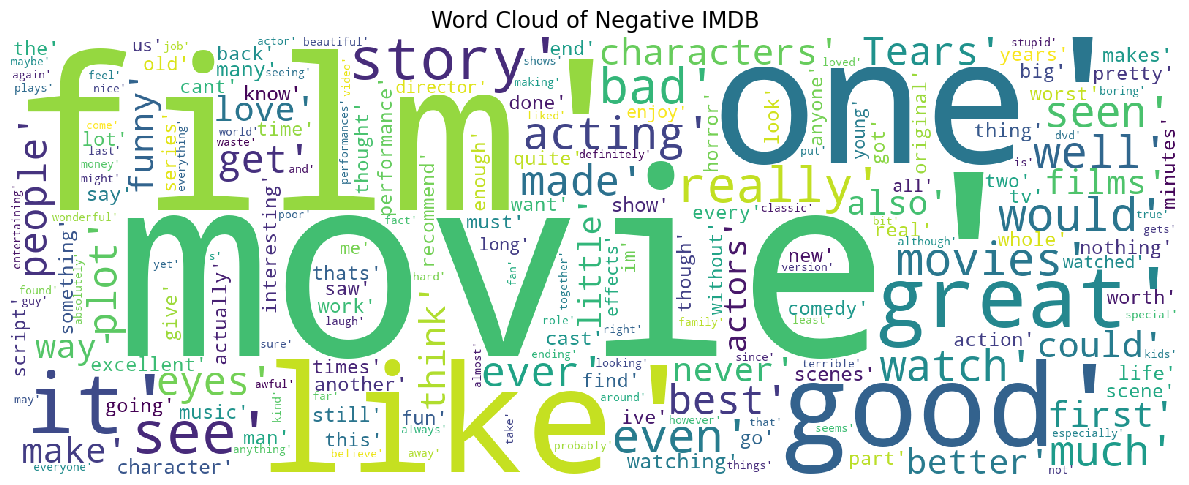

In [179]:
# Ensure that 'df_negative' contains only strings
df_negative = dataFrame['review'].astype(str)

# Generate the WordCloud
wordcloud = WordCloud(
    width=1600,
    height=600,
    collocations=False,
    background_color='white'
).generate(" ".join(df_negative))

# Plot the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis('off')  # Remove axes for better aesthetics
plt.title('Word Cloud of Negative IMDB', fontsize=16)
plt.tight_layout()
plt.show()

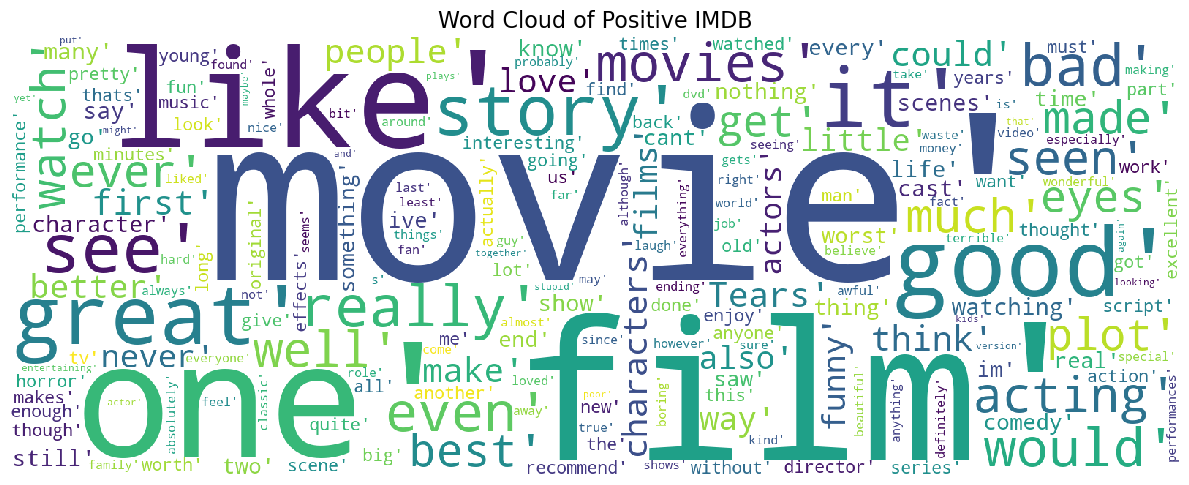

In [180]:
# Ensure 'df_positive' contains only strings
df_positive = dataFrame['review'].astype(str)

# Generate the WordCloud
wordcloud = WordCloud(
    width=1600,
    height=600,
    collocations=False,
    background_color='white',
    colormap='viridis'  # Adding a color map for better visualization
).generate(" ".join(df_positive))

# Plot the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis('off')  # Remove axes for better aesthetics
plt.title('Word Cloud of Positive IMDB', fontsize=16)
plt.tight_layout()
plt.show()

# Splitting Data for Traning and Testing for prediction

In [181]:
# Splitting our data into Train and Test
# Extracting features (tweets) and target (labels)
# Splitting data
X = dataFrame['review']
y = dataFrame['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Adjust sentiment label as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [182]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000,), (2001,), (8000,), (2001,))

In [183]:
# Assuming your DataFrame column X_train contains lists of words, join them into single strings
X_train = X_train.apply(lambda x: " ".join(x) if isinstance(x, list) else x)
X_test = X_test.apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Now fit the pipeline to the training data
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))),  # TfidfVectorizer step
    ('classifier', LogisticRegression())  # Logistic Regression step
])

# Fit the pipeline
pipeline.fit(X_train, y_train)



Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('classifier', LogisticRegression())])

In [184]:
# Get the shape of the resulting TF-IDF matrices from the vectorizer step
# This is done internally when the pipeline is fitted, so no need to manually fit_transform
X_train_tfidf = pipeline.named_steps['vectorizer'].transform(X_train)
X_test_tfidf = pipeline.named_steps['vectorizer'].transform(X_test)

print(f"TF-IDF Train shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test shape: {X_test_tfidf.shape}")


TF-IDF Train shape: (8000, 5000)
TF-IDF Test shape: (2001, 5000)


In [185]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [186]:
# Assuming y_test and y_pred are already defined from your model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame to display the metrics as a table
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
}
metrics_df = pd.DataFrame(metrics)
# Display the table
metrics_df

,Metric,Score
0,Accuracy,0.865067
1,Precision,0.847619
2,Recall,0.912395
3,F1 Score,0.878815


In [187]:
# Assuming y_test and y_pred are already defined from your model
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)
# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report).transpose()
# Display the classification report as a table
report_df

,precision,recall,f1-score,support
Negative,0.888889,0.810345,0.847802,928.000000
Positive,0.847619,0.912395,0.878815,1073.000000
accuracy,0.865067,0.865067,0.865067,0.865067
macro avg,0.868254,0.861370,0.863308,2001.000000
weighted avg,0.866759,0.865067,0.864432,2001.000000


In [188]:
# Assuming y_test and y_pred are already defined
cf_matrix = confusion_matrix(y_test, y_pred)

# Categories for the labels
categories = ['Negative', 'Positive']

# Convert the confusion matrix to a DataFrame for better handling in Plotly
cf_matrix_df = pd.DataFrame(cf_matrix, index=categories, columns=categories)

# Plotting the Confusion Matrix as a Heatmap using Plotly Express
fig = px.imshow(
    cf_matrix_df, 
    color_continuous_scale='RdBu',  # Color scale for heatmap
    title="Confusion Matrix for logistic regression",
    labels={'x': 'Predicted Labels', 'y': 'True Labels'},
    text_auto=True,  # Automatically add text annotations on cells
    height=500, width=600
)
# Show the plot
fig.show()
